# This dataset is 10x larger than in Decision-Trees-1 (i.e. 1k samples)

In [1]:
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
# %matplotlib inline


Bad key “backend in file /Users/guillermo/.matplotlib/matplotlibrc, line 1 ('“backend: TkAgg”')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


#### Mask the dataset creation for educational purposes (viewer: do not open)

In [2]:
data, labels = datasets.make_classification(n_samples=1000, n_features=5, n_classes=2, n_informative=3, n_redundant=0, n_repeated=0, random_state=7)

#### Frame the data with features names for educational purposes

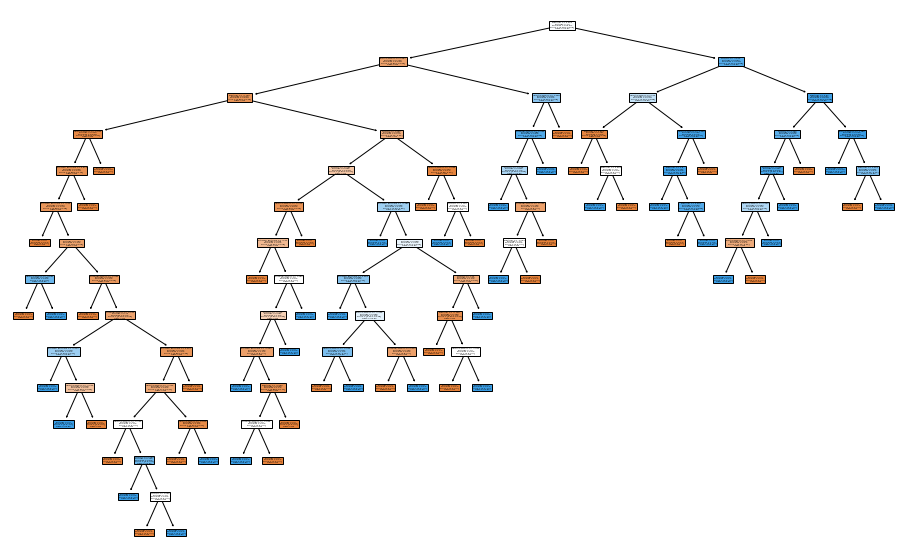

In [3]:
df_data = pandas.DataFrame(data, columns=['comms', 'remote access', 'weather', 'external partners', 'physical access'])
df_labels = pandas.DataFrame(labels, columns=['go/no-go criterion']) # go=0, no-go=1
dataset = pandas.concat([df_data, df_labels], axis=1)  # put observations and label data together
# dataset.head()  # view some of the data for sanity check

data_train, data_test, labels_train, labels_test = model_selection.train_test_split(df_data, df_labels, test_size=0.2, random_state=7)

my_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)

my_decision_tree.fit(X=data_train, y=labels_train)

plt.figure(figsize=(16,10))
tree.plot_tree(my_decision_tree, feature_names=data_train.columns, class_names=['go', 'no-go'], filled=True, proportion=True)
plt.show()

# Comments on Decision Tree Above

Wow. We see there is a more complex decision process now that we've included more data! As mentioned before, we could employ some pruning techniques where we remove some nodes to make this model less complex. Through this process we find configurations that will improve the model's performance.

Speaking of performance, what is the current model's accuracy given more data?

In [4]:
avg_accuracy = my_decision_tree.score(X=data_test, y=labels_test)
print('Average Accuracy: {}%'.format(avg_accuracy * 100))

Average Accuracy: 89.0%


#### We find that simply more data has improved our model's accuracy. We love our data! :)

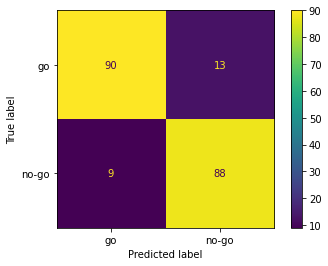

In [5]:
plot_confusion_matrix(my_decision_tree, X=data_test, y_true=labels_test, display_labels=['go', 'no-go'])

#### We see that we still have issues with classifying a "go" status. Notably, in our last model we had 0 issues with "no-go" status, but in this model, and given more data, it seems we have encouter some confusions, thus misclassifications

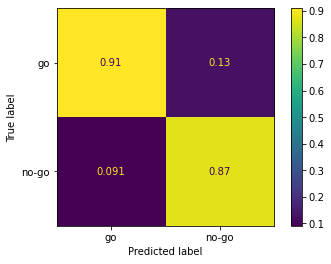

In [6]:
plot_confusion_matrix(my_decision_tree, X=data_test, y_true=labels_test, display_labels=['go', 'no-go'], normalize='pred')

# Feature to Model Analysis

In [7]:
from sklearn.inspection import permutation_importance
def plot_importance(estimator, xtrain, ytrain, title, font_size=16, features=None):
    results = permutation_importance(estimator, xtrain, ytrain, random_state=7)
    axx = pandas.DataFrame(results['importances_mean']).T.plot(grid=True, kind='bar')
    axx.legend(features, fontsize=font_size)
    axx.set_title(title, fontsize=font_size)
    axx.set_xlabel('features', fontsize=font_size)
    axx.set_ylabel('score', fontsize=font_size)
    return results

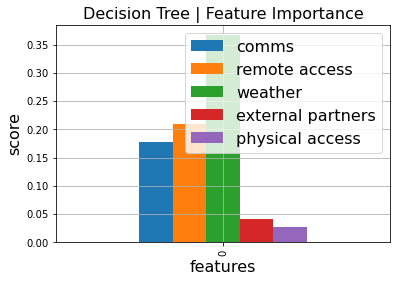

In [8]:
x = plot_importance(my_decision_tree, data_train, labels_train, title='Decision Tree | Feature Importance', features=data_train.columns)

#### What we see up here is one of the most important concepts to rememebr. As we'll see in the data-analysis

In [9]:
new_data_train = data_train.drop(columns=['weather', 'external partners'])
new_data_test = data_test.drop(columns=['weather', 'external partners'])
new_labels_train = labels_train  # For sake of completeness we'll just copy it over to new variables
new_labels_test = labels_test

In [10]:
# ensure the columns are dropped
new_data_train.head()

,comms,remote access,physical access
600,3.489221,-2.498993,-0.342460
80,3.160467,-1.028050,0.050296
158,-0.623743,0.962101,0.456116
423,3.898662,-2.403532,0.358893
747,0.609069,-0.041181,-0.056543


In [11]:
new_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)
new_tree.fit(X=new_data_train, y=labels_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

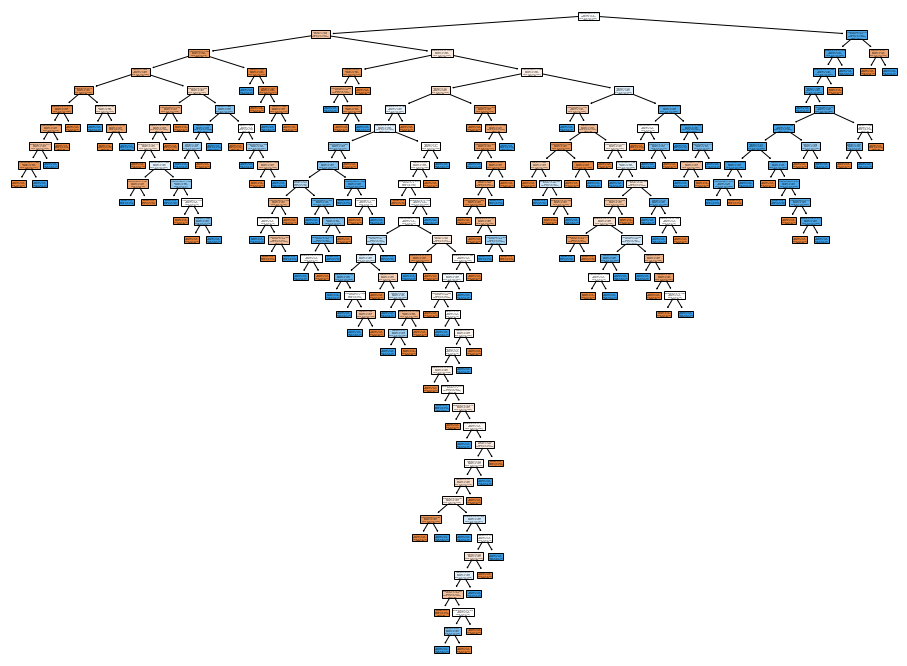

In [12]:
plt.figure(figsize=(16,12))
tree.plot_tree(new_tree, feature_names=new_data_train.columns, class_names=['go', 'no-go'], filled=True, proportion=True)
plt.show()

In [13]:
mean_accuracy = new_tree.score(X=new_data_test, y=new_labels_test)
print('mean accuracy: {}%'.format(mean_accuracy * 100))

mean accuracy: 67.5%


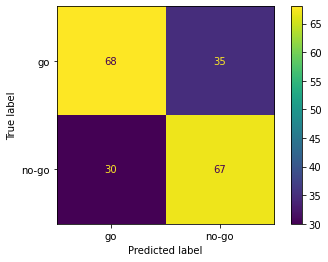

In [14]:
plot_confusion_matrix(new_tree, X=new_data_test, y_true=new_labels_test, display_labels=['go', 'no-go'])

# As an exercise, choose different features to drop and graph the decision tree's logic. Does anything happen to its logic?

This function will also present your model's accuracy and confusion matrix

In [15]:
def plot_not_these_features(features=['weather', 'external partners']):
    temp_data_train = data_train.drop(columns=features)
    temp_data_test = data_test.drop(columns=features)
    the_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)
    the_tree.fit(X=temp_data_train, y=labels_train)
    
    # Plot Decision Tree's logic
    plt.figure(figsize=(16,12))
    tree.plot_tree(the_tree, feature_names=temp_data_train.columns, class_names=['go', 'no-go'], filled=True, proportion=True)
    plt.show()
    
    # Print tree's accuracy
    mean_accuracy = the_tree.score(X=temp_data_test, y=labels_test)
    print('\nmean accuracy: {}%\n'.format(mean_accuracy * 100))
    
    # Plot confusion matrix
    plot_confusion_matrix(the_tree, X=temp_data_test, y_true=labels_test, display_labels=['go', 'no-go'])

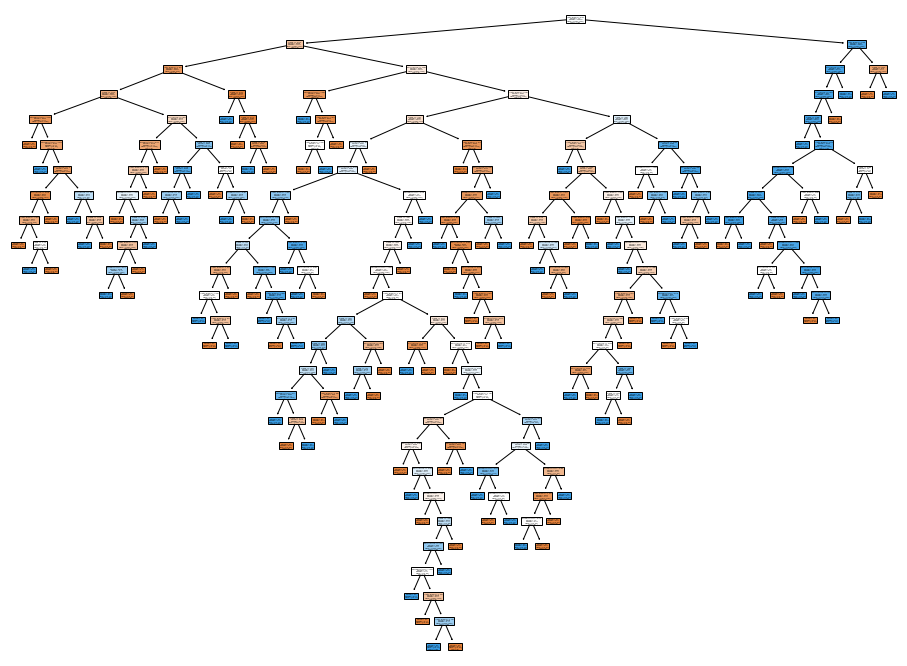


mean accuracy: 68.5%



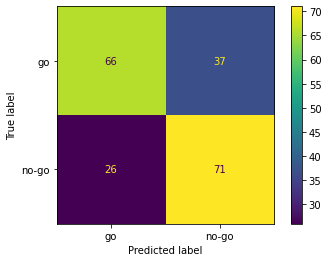

In [16]:
plot_not_these_features(features=['weather'])